# EXPLORATION 5 : 나랑 닮은 연예인은 누구?

## 준비한 데이터
- 내 사진 2장
- 연예인 사진 283장

## 1. 라이브러리 import 및 함수선언

In [1]:
import face_recognition
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# 이미지를 불러온 후 얼굴을 face_recognition.face_locations를 사용해 찾고, 임베딩 추출을 할 이미지를 만들기 위해 잘라준다.
def get_cropped_face(image_file):         
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) >0:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c, d:b, :] # 얼굴영역의 위치가 검출되면 그 위치값을 기반으로 얼굴을 자름
        return cropped_face              # 자른 얼굴을 리턴
    else:
        return []                         # 얼굴 검출이 안되면 빈 리스트 리턴

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# images 디렉토리 안에 있는 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수
def get_face_embedding_dict(dir_path):  
    file_list = os.listdir(dir_path)
    file_list_jpg = [file for file in file_list if file.endswith((".jpg",".jpeg",".JPG",".png"))] # 디렉토리 에러가 떠서 추가함
    embedding_dict = {}
    
    for file in file_list_jpg:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if len(face) == 0:
            continue        
        embedding = get_face_embedding(face)
        if len(embedding) > 0:    # 얼굴영역 face가 제대로 detect되지 않으면 len(embedding)==0인 경우가 발생하기 때문에 추가
            embedding_dict[os.path.splitext(file)[0]] = embedding[0] # 이미지파일명에서 확장자를 제거
    return embedding_dict

# 두 임베딩 벡터 간의 거리를 계산하는 함수
def get_distance(name1, name2):         
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

## 2. 이미지 폴더 확인하기

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/image'
file_list = os.listdir(dir_path)
print("파일개수 : ", len(file_list),"개", '\n')
print(file_list)

파일개수 :  286 개 

['리사.jpg', '손예진.jpeg', '이준혁.jpeg', '이제훈.jpeg', '대도서관.jpeg', '산들.jpeg', '장원준.jpeg', '차명석.jpg', '씨잼.jpg', '성시경.jpg', '노무현.jpeg', '최무성.jpg', '시우민.jpg', '잇섭.png', '박휘순.jpg', '유지태.jpg', '심수창.jpeg', '김현수.jpeg', '숀_코네리.jpg', '도지한.jpg', '조달환.png', '피어스_브로스넌.jpg', '윤균상.jpg', '송중기.jpeg', '영알남.png', '노홍철.jpeg', '이대형.jpg', '문별.jpg', '백현.jpg', '류승범.jpg', '제프리_힌턴.jpg', '아놀드_슈워제네거.jpg', '티모시_달튼.jpeg', '한기범.jpg', '유해진.jpg', '러블리즈예인.jpg', '하승진.jpg', '봉준호.jpg', '박찬호.jpg', '사쿠라.jpg', '황정민.jpg', '찬열.jpeg', '.ipynb_checkpoints', '개코.jpeg', '정형돈.jpg', '김고은.jpeg', '잭_니콜슨.jpeg', '화사.jpg', '세훈.jpg', '이종석.jpeg', '이효리.jpg', '스윙스.jpeg', '신동엽.jpg', '유아.jpg', '이승기.jpeg', '지수.jpg', '정준하.jpg', '김민재.jpeg', '태연.jpg', '나인뮤지스경리.jpg', '문재인.jpeg', '수지.jpg', '하정우.jpg', '딕헌터.jpeg', '드웨인_존슨.jpg', '공유.jpg', '레드벨벳웬디.jpg', '박서준.jpeg', '윤아.jpg', '이범수.jpeg', '여자아이들수진.jpeg', '클린트_이스트우드.jpg', '류현진.jpg', '잇지예지.jpeg', '이광수.jpg', '잇지유나.jpg', '도아.jpeg', '트와이스사나.jpg', '트와이스모모.jpeg', '옥냥이.jpeg', '우기.jpg', '박보검.jpg', '브래들리_

내 사진 2개를 포함하여 총 286개의 파일이 디렉토리에 있다.(중간에 '.ipynb_checkpoints' 폴더도 보인다.. 이번 노드 문제의 원인)

## 3. 내 사진들끼리의 얼굴 임베딩 벡터 거리 구하기
- 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있다.

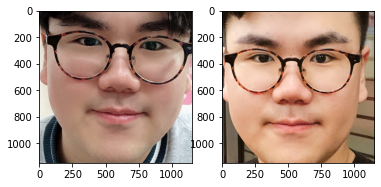

In [3]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/image'
image_path1 = os.getenv('HOME')+'/aiffel/face_embedding/image/1.JPG'    # 첫번째 사진
image_path2 = os.getenv('HOME')+'/aiffel/face_embedding/image/2.JPG'    # 두번째 사진

face1 = get_cropped_face(image_path1)
plt.subplot(1,2,1)
plt.imshow(face1)
face2 = get_cropped_face(image_path2)
plt.subplot(1,2,2)
plt.imshow(face2)

In [4]:
embedding_dict = get_face_embedding_dict(image_path)

get_distance('1', '2')

0.3216032733259183

내 사진간의 얼굴 임베딩 벡터 거리는 약 0.32로 낮다.

## 4. 연예인들과 임베딩 벡터 거리를 비교하는 함수 추가

In [5]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :               # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if i == 1 :               # 두번째도 자기 자신일 것이므로 제외.
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i-1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

## 5. 나랑 가장 닮은 연예인 순위로 나타내기

In [6]:
get_nearest_face('1')

순위 1 : 이름(성시경), 거리(0.4559426359152012)
순위 2 : 이름(박성호), 거리(0.4822365792437844)
순위 3 : 이름(목진화), 거리(0.4836733923342726)
순위 4 : 이름(최양락), 거리(0.49274234003181966)
순위 5 : 이름(김연우), 거리(0.494108918683594)


내 첫번째 사진은 성시경이 가장 닮았다고 나온다.

In [7]:
get_nearest_face('2')

순위 1 : 이름(김연우), 거리(0.4690851201434964)
순위 2 : 이름(성시경), 거리(0.46949927139645165)
순위 3 : 이름(박휘순), 거리(0.48236895772707744)
순위 4 : 이름(최양락), 거리(0.4832182610660139)
순위 5 : 이름(최현석), 거리(0.4937027196486934)


내 두 번째 사진으로 순위를 나타낸 결과 김연우와 가장 닮았다고 나오는데  
성시경도 그렇고 혹시 안경 때문에 그런가 의심이 들어 확인을 해봐야겠다.

## 6. 나와 닮은 연예인들 시각화

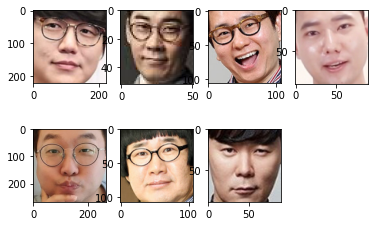

In [8]:
rank =[0,1,2,3,4,5,6]
rank[0] = os.path.join(image_path, "성시경.jpg")
rank[1] = os.path.join(image_path, "김연우.jpeg")
rank[2] = os.path.join(image_path, "박성호.jpg")
rank[3] = os.path.join(image_path, "목진화.png")  # 누군가 했더니 승우아빠
rank[4] = os.path.join(image_path, "박휘순.jpg")
rank[5] = os.path.join(image_path, "최양락.jpg")
rank[6] = os.path.join(image_path, "최현석.jpg")

for i in range(7):
    face = get_cropped_face(rank[i])
    plt.subplot(2,4,i+1)
    plt.imshow(face)

아무래도 안경의 영향이 많이 있는 것 같다. 

# 프로젝트 결과

### 문제점
1. 처음에 IsADirectoryError가 떠서 알아보니까 주피터를 사용하면서 '.ipynb_checkpoints'라는 폴더가 숨김으로 들어가 있는걸 알게되었다. 그래서 get_face_embedding_dict 함수를 수정했는데 os.listdir 함수를 쓰면 파일과 폴더를 모두 반환하기 때문에 ".jpg",".jpeg",".JPG",".png"가 포함된 파일만 반환하도록 수정했다. (나중에 알았는데 try except 구문을 사용하면 쉽게 해결이 가능했다.)
2. 사진 중에 얼굴 인식이 안되는 사진은 예외처리를 해줘야 하는데 if else 구문을 사용해서 인식이 안되는 경우 빈 리스트를 리턴하게 해서 해결하였다. 
3. 이번 프로젝트는 단순히 임베딩 벡터값만 수치적으로 비교하는 것이기 때문에 사실상 얼굴이 닮았다기 보단 수치적으로만 닮은 거라는 생각이 들었다. 그래서 그런지 안경쓴 사진을 넣어서 안경을 낀 연예인이 많이 나왔다.

### 느낀점
1. 프로젝트를 하면서 오류를 경험하니까 그 오류에 대한 해결책을 찾아보면서 공부가 더 많이 된다는 느낌을 받았다.
2. 좀 더 다른 방식으로(더 똑똑한 방식으로) 얼굴이 닮은 정도를 비교하는 모델을 사용해보고 싶다는 생각이 들었다.
3. 컴퓨터 비전 분야는 역시 재밌다.